Dataset link: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import cv2


In [4]:
# class labels
class_names = ['no', 'yes']

In [5]:
#Load the images and labels
images = []
labels = []
img_names = []
for class_name in class_names:
    path =  class_name
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        images.append(img)
        labels.append(class_names.index(class_name))
        img_names.append(img_name)
images = np.array(images)
labels = np.array(labels)

In [6]:
# Split the data into training and validation sets
split_idx = int(0.8 * len(images))
train_images, train_labels = images[:split_idx], labels[:split_idx]
val_images, val_labels = images[split_idx:], labels[split_idx:]
val_img_names = img_names[split_idx:]

In [7]:
# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])


In [8]:

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10


7/7 [==============================] - 8s 868ms/step - loss: 1840.7290 - accuracy: 0.3960 - val_loss: 166.8688 - val_accuracy: 0.0980
Epoch 2/10
7/7 [==============================] - 6s 847ms/step - loss: 120.2407 - accuracy: 0.6139 - val_loss: 4.9052e-15 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 6s 791ms/step - loss: 45.8239 - accuracy: 0.6782 - val_loss: 5.0919 - val_accuracy: 0.6275
Epoch 4/10
7/7 [==============================] - 6s 906ms/step - loss: 11.6065 - accuracy: 0.6139 - val_loss: 0.4730 - val_accuracy: 0.8039
Epoch 5/10
7/7 [==============================] - 6s 812ms/step - loss: 1.7233 - accuracy: 0.7772 - val_loss: 0.2030 - val_accuracy: 0.9412
Epoch 6/10
7/7 [==============================] - 5s 753ms/step - loss: 0.8848 - accuracy: 0.7822 - val_loss: 0.3280 - val_accuracy: 0.8039
Epoch 7/10
7/7 [==============================] - 5s 747ms/step - loss: 0.4854 - accuracy: 0.7970 - val_loss: 0.4461 - val_accuracy: 0.7255
Epoch

In [9]:
# Evaluate the model on the validation set
val_pred = model.predict(val_images)
val_pred_labels = np.round(val_pred)
val_acc = np.mean(val_pred_labels == val_labels)
print('Validation accuracy:', val_acc)

2/2 [==============================] - 0s 69ms/step
Validation accuracy: 0.7647058823529411


In [10]:
# Shuffle the validation images and labels
val_indices = np.random.permutation(len(val_images))
val_images_shuffled = val_images[val_indices]
val_labels_shuffled = val_labels[val_indices]
val_img_names_shuffled = [val_img_names[i] for i in val_indices]


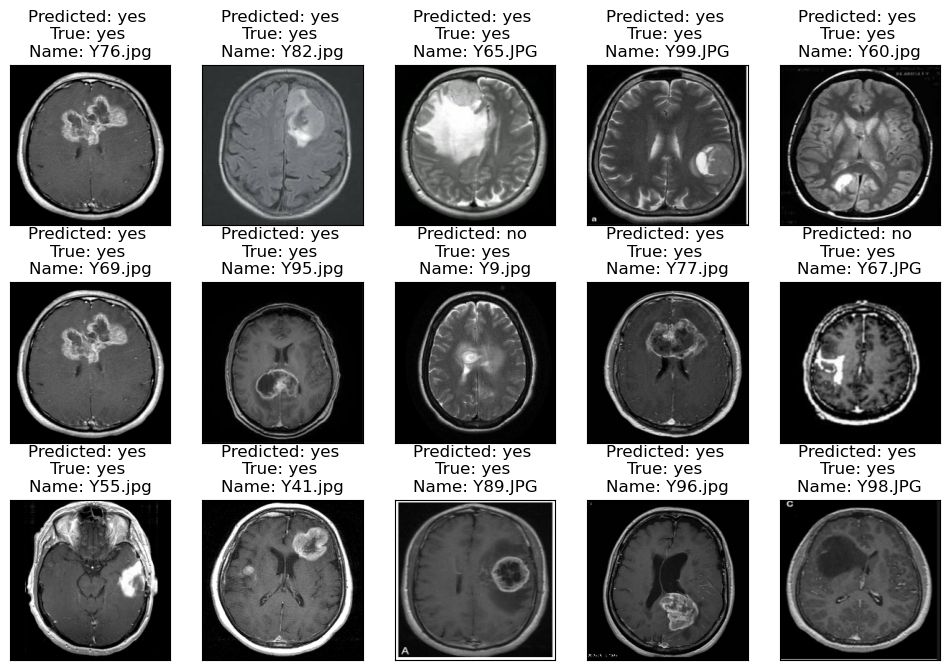

In [11]:
# Display some predicted images alongside their true labels and names
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(val_images_shuffled[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Predicted: {} \nTrue: {} \nName: {}'.format(class_names[int(val_pred_labels[val_indices[i]])], class_names[val_labels_shuffled[i]], val_img_names_shuffled[i]))
plt.show()